# Business Requirement

As REIT developer whom need to estimate precious pricing for all accomodation arounf Bangkok
if we can predict price for each unit we can planning investment for land buying and creat resident accomodation to sell


# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

#### train data : 14,271 rows x 23 columns including `price`

In [3]:
print(train_df.shape)
train_df.head()

(14271, 23)


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


#### test data : 2,500 rows x 22 columns w/o `price`

In [4]:
print(test_df.shape)
train_df.head()

(2500, 22)


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


# Exploratory data analysis

#### target value : `price`

Text(0.5, 1.0, 'Distribution of Price by Province')

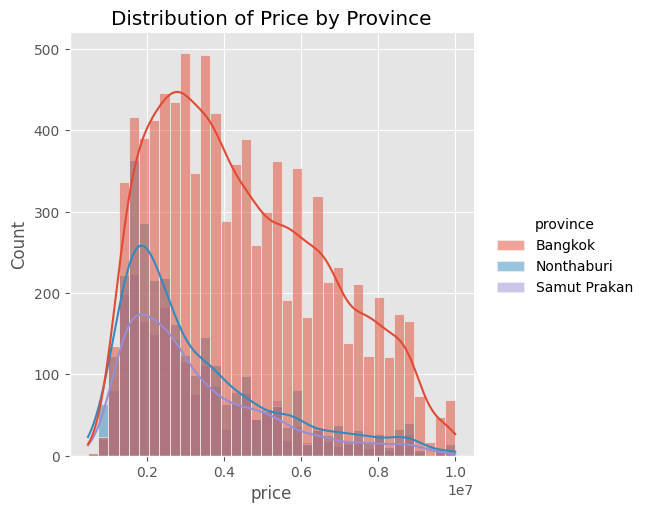

In [5]:
sns.displot(x="price", hue='province', kde=True, data=train_df)
plt.title('Distribution of Price by Province')

province
Bangkok         9130
Nonthaburi      2970
Samut Prakan    2171
Name: id, dtype: int64


<Axes: ylabel='province'>

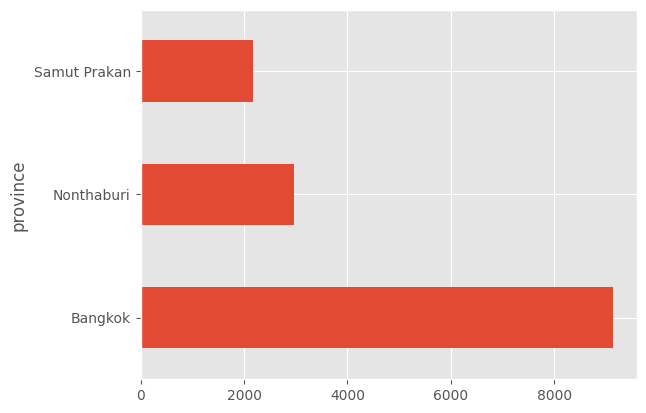

In [6]:
# Comments
# Province have their own characteristics correlate with price 
# Bangkok is the most expensive

# Count anount of each province
print(train_df.groupby('province')['id'].count())
train_df.groupby('province')['id'].count().plot(kind='barh')

Text(0, 0.5, 'District')

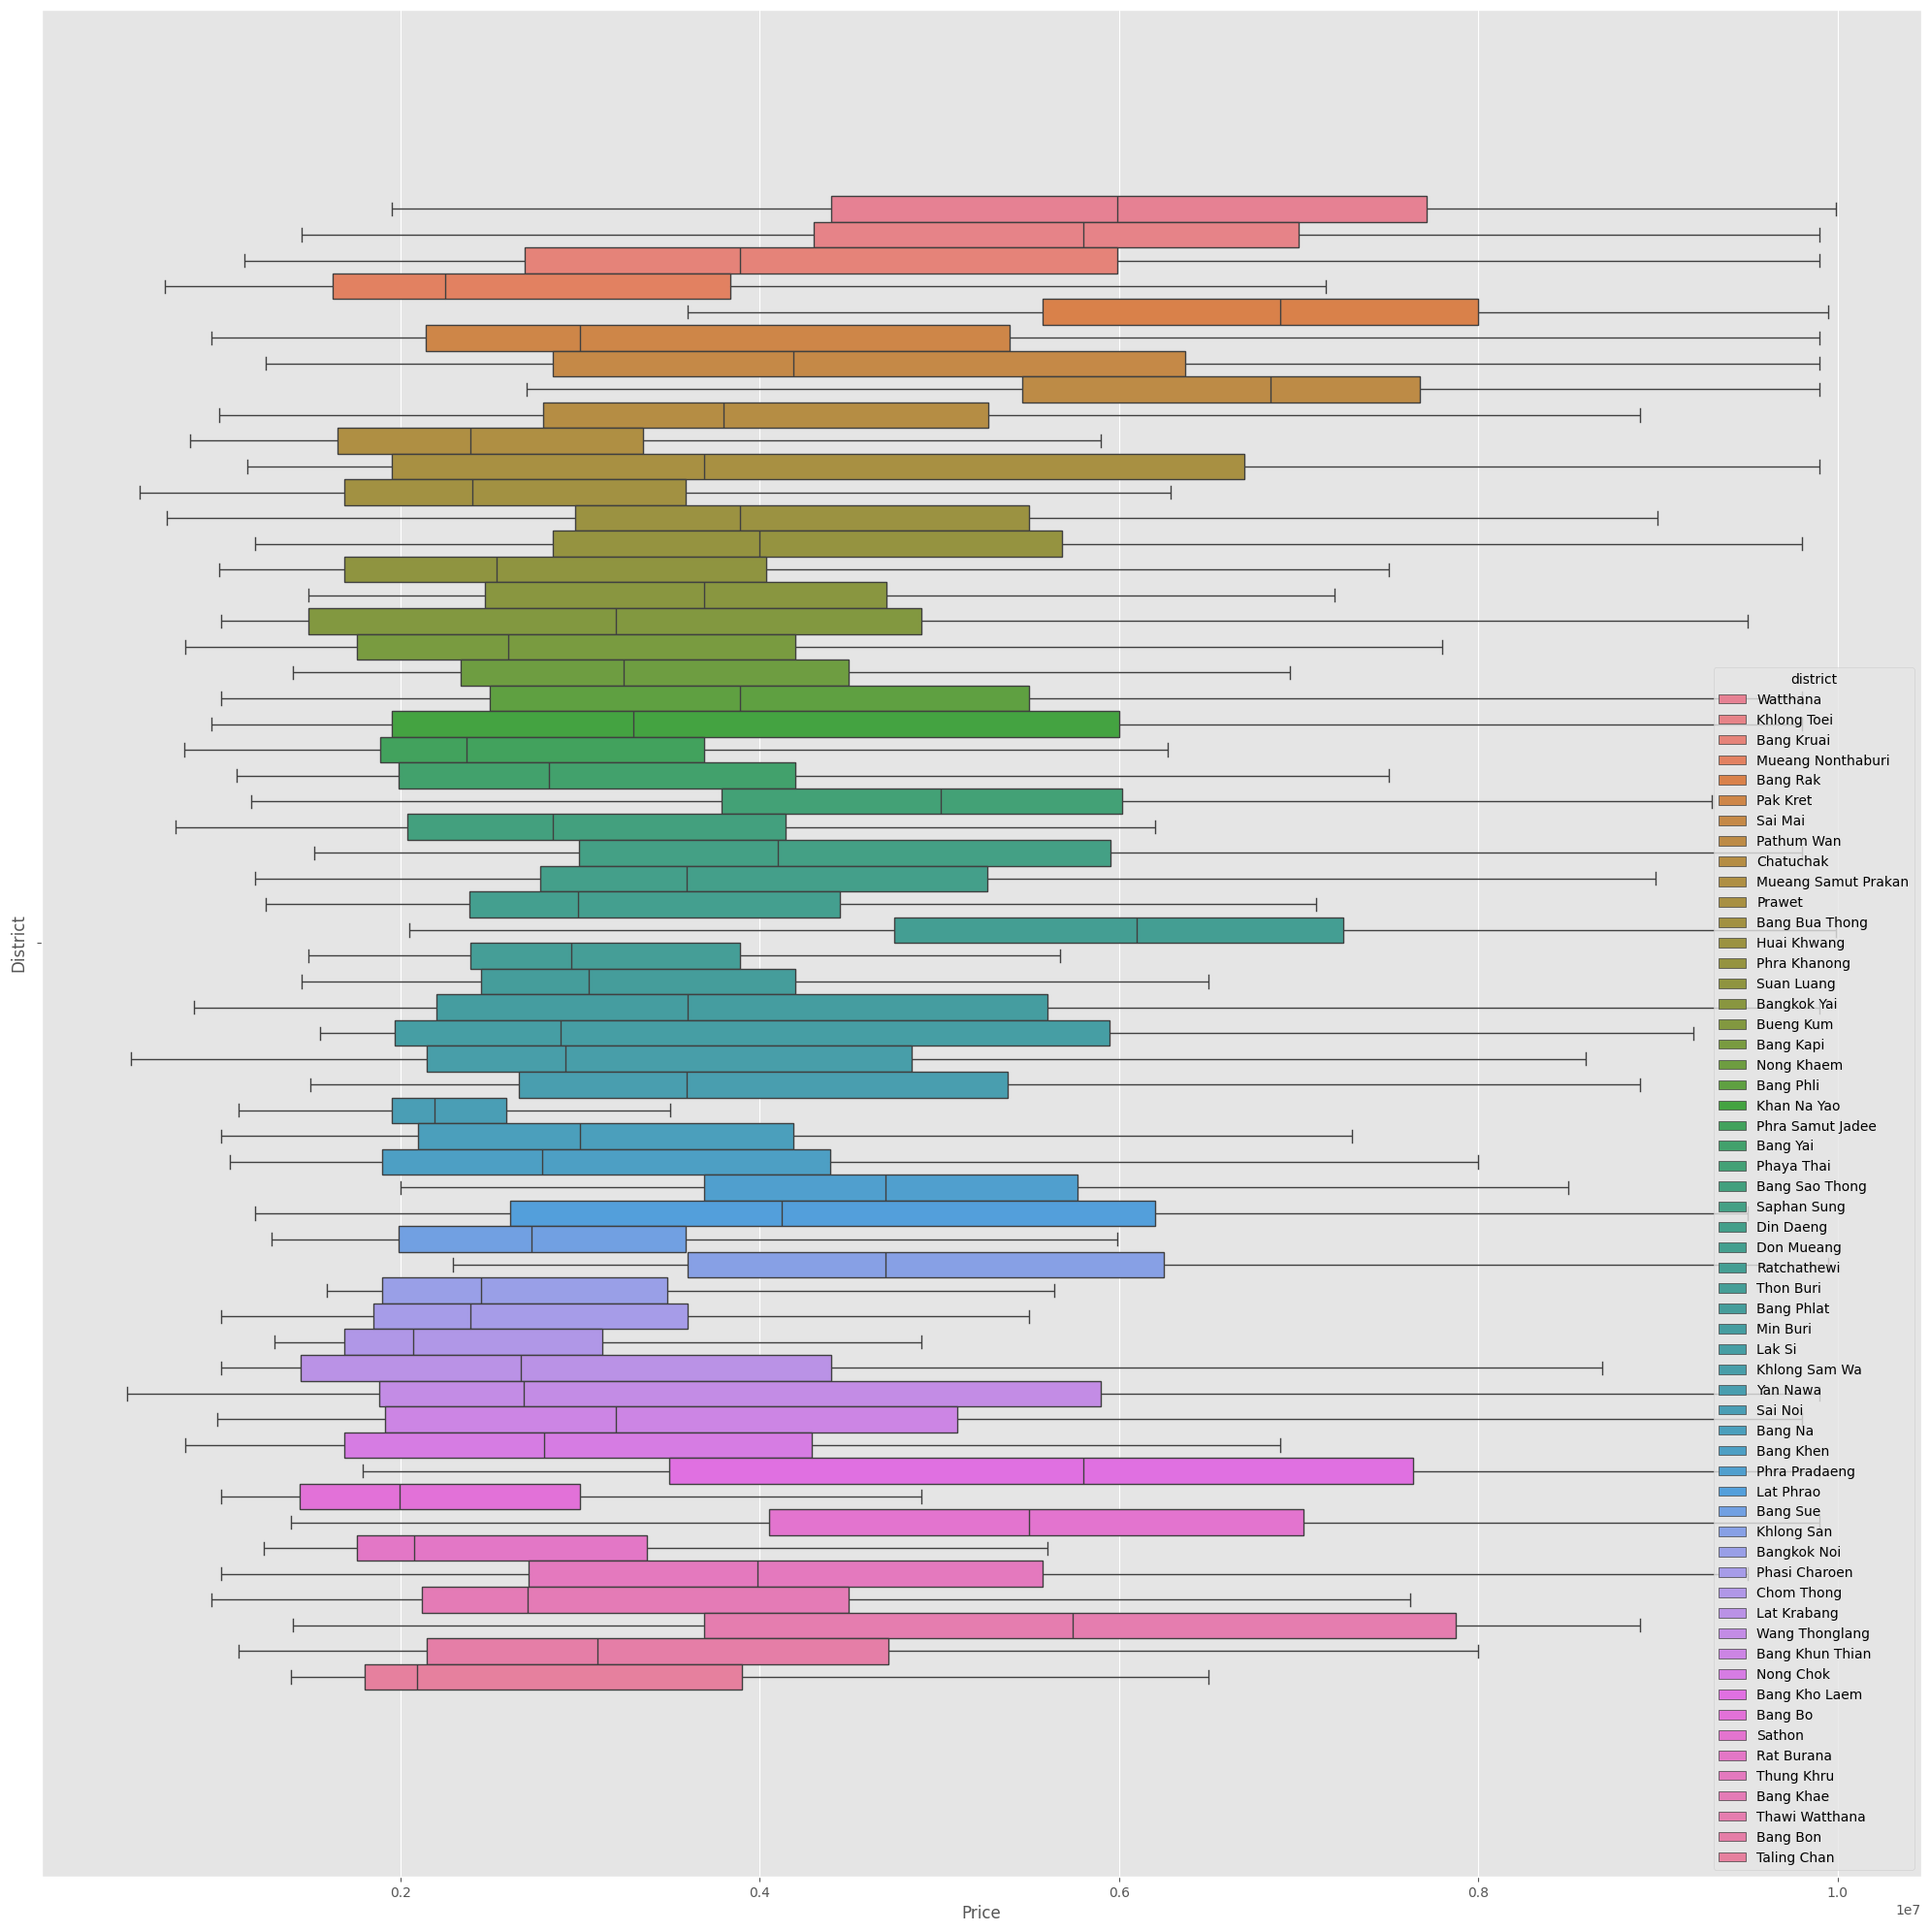

In [7]:
plt.figure(figsize=(25,25))
sns.boxplot(x="price", hue='district', data=train_df, legend="brief", showfliers=False)
plt.xlabel("Price")
plt.ylabel("District")

In [8]:
# Check disperse data by district

#### find missing value

<Axes: >

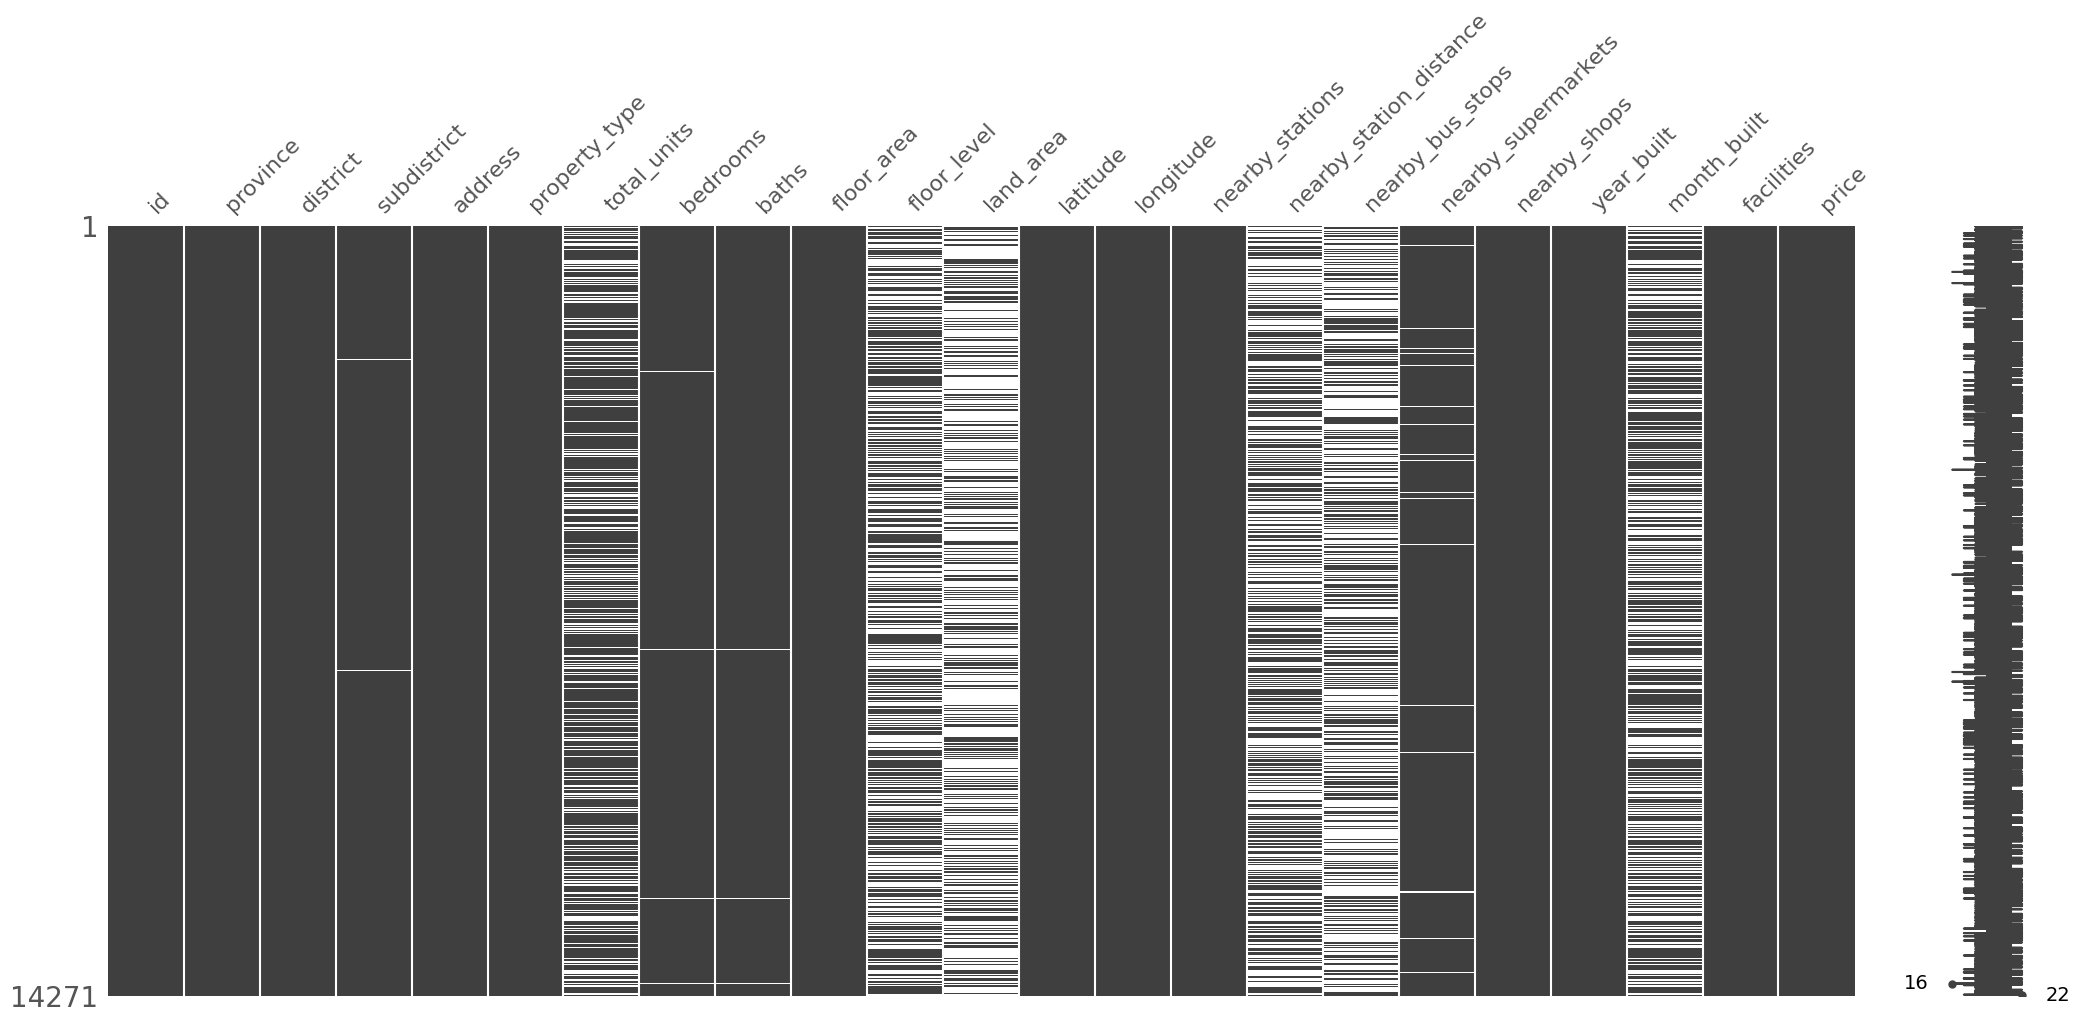

In [9]:
# check overall null values
msno.matrix(train_df)

In [10]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

In [11]:
# check missing values bedrooms to see context
train_df[train_df['bedrooms'].isna()].head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
854,10080251,Bangkok,Phra Khanong,Bang Chak,Soi Sukhumvit 97/1,Condo,1245.0,NaN,1.0,29,...,100.614429,0,None,NaN,7.0,6,2019,None,"[Community Garden, CCTV, Fitness corner, 24 ho...",1550000
1071,10815633,Nonthaburi,Pak Kret,Pak Kret,Changwattana Road,Condo,525.0,NaN,1.0,46,...,100.511452,0,None,20.0,3.0,10,2011,July,"[Car Park, Community Garden, CCTV, Gymnasium r...",1450000
1079,8132288,Bangkok,Lat Krabang,Lat Krabang,Lat Krabang,Detached House,NaN,NaN,3.0,59,...,100.777442,0,None,8.0,NaN,2,0,None,"[BBQ pits, Covered car park, Clubhouse, Gymnas...",5990000
1359,10538163,Bangkok,Bang Phlat,Bang O,along the expressway Si Rat Road-Outer Ring Road,Townhouse,253.0,NaN,NaN,145,...,100.495681,0,None,NaN,7.0,2,2018,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",5600000
1987,10102700,Bangkok,Suan Luang,Suan Luang,Suan Luang,Townhouse,NaN,NaN,3.0,250,...,100.653444,0,None,15.0,6.0,6,0,None,"[Gymnasium room, 24 hours security, Swimming p...",8600000


In [12]:
# found that no bedroom means studio in condo type


#### `property_type` and `province`

property_type
Condo             9206
Detached House    2169
Townhouse         2896
Name: id, dtype: int64


<Axes: ylabel='property_type'>

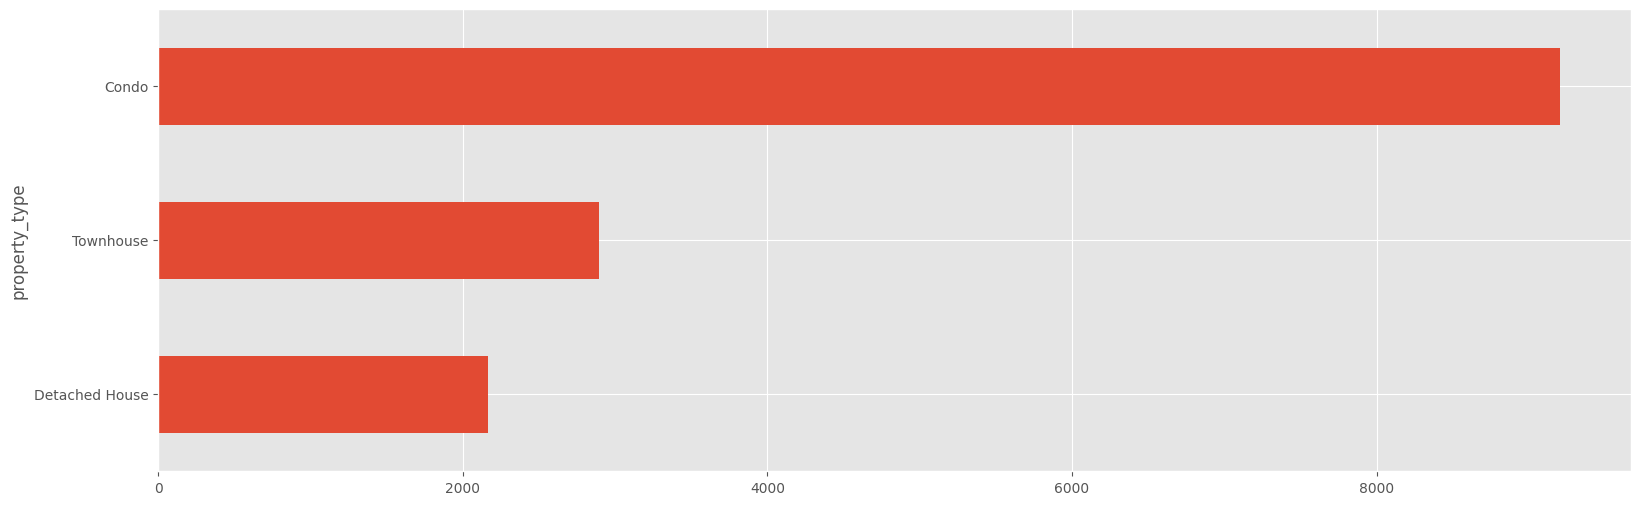

In [13]:
print(train_df.groupby('property_type')['id'].count())
train_df.groupby('property_type')['id'].count().sort_values(ascending=True).plot(kind='barh', figsize=(19,6))

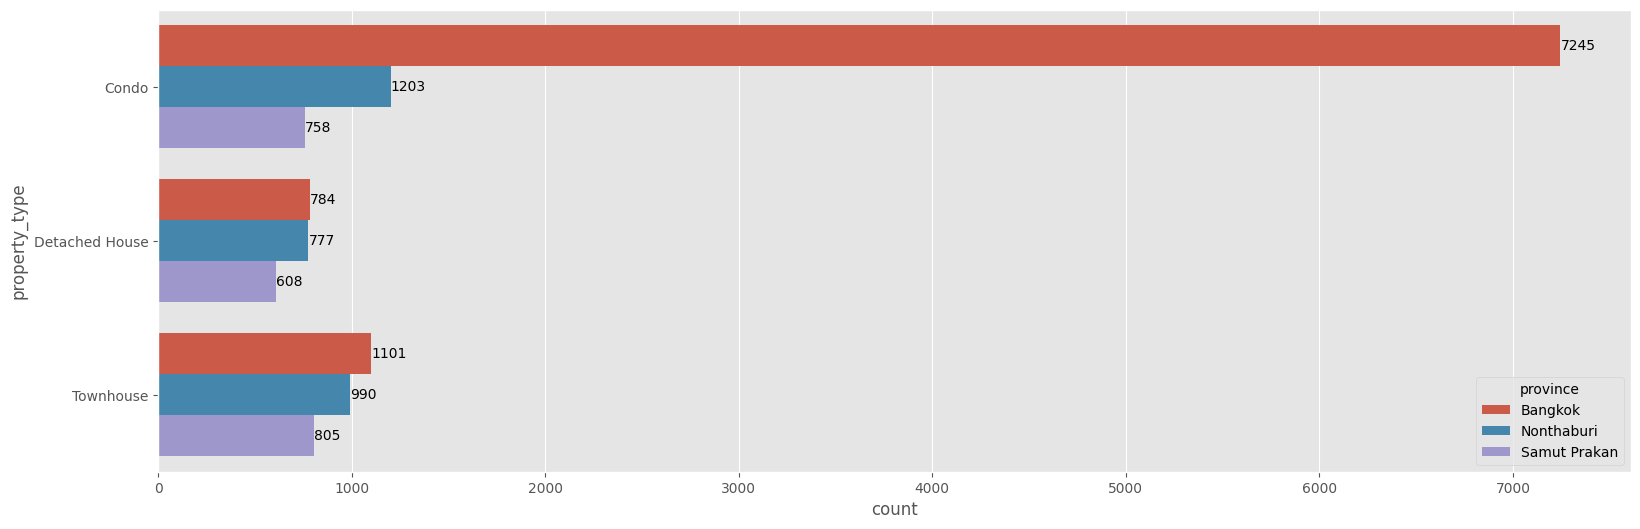

In [14]:
ax = sns.countplot(y='property_type', hue="province", data=train_df)
for i in range(3):
  ax.bar_label(ax.containers[i])
ax.figure.set_size_inches(19, 6)


Condo have the most volume 
and bangkok have the most condo compare to Nonthaburi and Samut Prakan

#### Discover correlation

<Axes: >

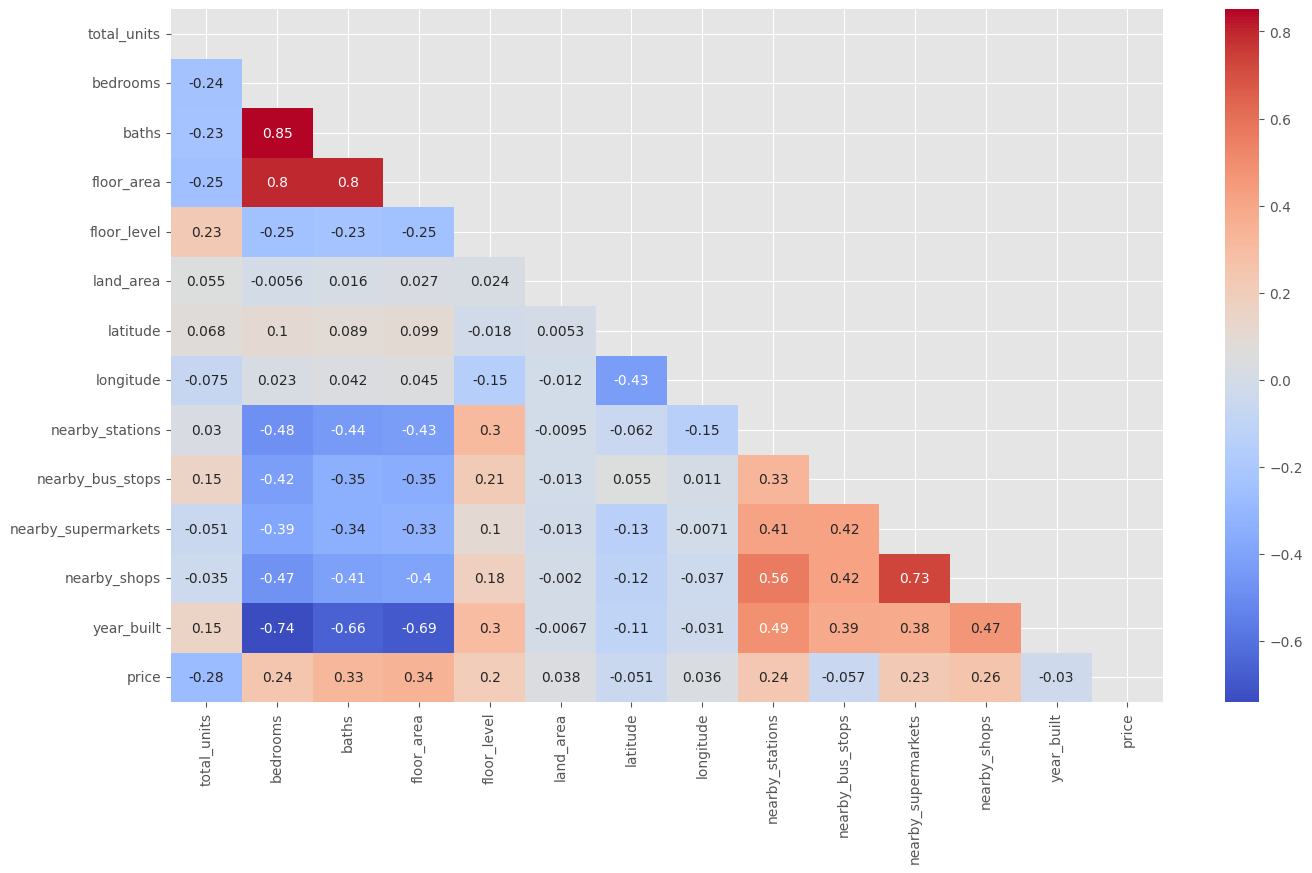

In [15]:
# Check correlation between numeric variables
plt.figure(figsize=(16, 9))
sns.heatmap(train_df.drop(columns=["id"]).corr(numeric_only=True), annot=True, cmap='coolwarm', mask=np.triu(train_df.drop(columns=["id"]).corr(numeric_only=True)))

Found that `bedrooms`, `baths` `floor_area`, `floor_level`, `nearby_Stations`, `nearby_supermarkets`, and `nearby_shops` have affected to `price`

#### scatter plot

<Axes: xlabel='floor_area', ylabel='price'>

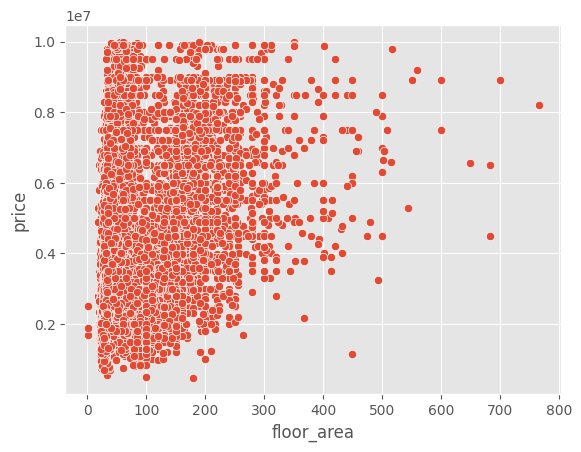

In [16]:
sns.scatterplot(x='floor_area', y='price', data=train_df)

#### facilities

In [17]:
# Count number of facilities
from collections import Counter

facility_count = Counter()
for f in train_df.facilities:
    facility_count.update(f)

facility_count.most_common(10)

[('24 hours security', 11675),
 ('CCTV', 10504),
 ('Swimming pool', 9993),
 ('Fitness corner', 9148),
 ('Covered car park', 6182),
 ('Car Park', 5533),
 ('Community Garden', 3528),
 ('Lift lobby', 3195),
 ('Gymnasium room', 2661),
 ('Clubhouse', 2492)]

#### map

In [18]:
fig = px.scatter_mapbox(
    data_frame=train_df,
    lat="latitude",
    lon="longitude",
    hover_data=["id", "price"],
    color="province",
    size="price",
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

## Experiment How Far From Siam
create function to get distant from Siam (hypothesis that Siam is Expensive price for Accomodation)


In [19]:
from sklearn.metrics.pairwise import haversine_distances

def distant_to_siam(lat, long):
    # https://maps.app.goo.gl/E954o1rAdTKxDHyG6
    siam_lat = 13.7465
    siam_long = 100.532
    return haversine_distances([[lat, long], [siam_lat, siam_long]])[0][1]

In [20]:
# Comments
# Since these points are on the globe, a sphere, we need to use Haversine distance and not Euclidian distance
# https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=For%20example%2C%20haversine(%CE%B8),longitude%20of%20the%20two%20points.

# change to haversine_distances
def distant_from_siam(lat, long):
    # https://maps.app.goo.gl/E954o1rAdTKxDHyG6
    siam_lat = 13.7465
    siam_long = 100.532
    return haversine_distances([[lat, long], [siam_lat, siam_long]])[0][1]

# Modelling

#### feature selection

In [21]:
# Experiment
# train_df['distant_to_siam'] = train_df.apply(lambda x: distant_to_siam(x['latitude'], x['longitude']), axis=1)
# test_df['distant_to_siam'] = test_df.apply(lambda x: distant_to_siam(x['latitude'], x['longitude']), axis=1)

# change to haversine_distances
train_df['distant_to_siam'] = train_df.apply(lambda x: distant_from_siam(x['latitude'], x['longitude']), axis=1)
test_df['distant_to_siam'] = test_df.apply(lambda x: distant_from_siam(x['latitude'], x['longitude']), axis=1)

In [22]:
# check nearby_station_distance to finding features and decide to ignore it
train_df['nearby_station_distance']

0          [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]
1        [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...
2        [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...
3                                                     None
4                       [[PP09 Yaek Nonthaburi 1 MRT, 10]]
                               ...                        
14266    [[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...
14267                                                 None
14268                                                 None
14269                                                 None
14270    [[S8 Wongwian Yai BTS, 200], [G1/S7 Krung Thon...
Name: nearby_station_distance, Length: 14271, dtype: object

In [23]:
# split facilities to columns
for col in facility_count.keys():
  train_df[col] = train_df["facilities"].apply(lambda x: 1 if col in x else 0)
  test_df[col] = test_df["facilities"].apply(lambda x: 1 if col in x else 0)

list(facility_count.keys())  

['Car Park',
 'Community Garden',
 'CCTV',
 'Fitness corner',
 '24 hours security',
 'Swimming pool',
 'Clubhouse',
 'Covered car park',
 'Playground',
 'Sky Lounge',
 'Mini-Mart',
 'Sauna',
 'Gymnasium room',
 'Library',
 'Lift lobby',
 'Lounge',
 'Steam bath',
 "Children's Playground",
 'Community Plaza',
 'Club',
 'Pavillion',
 'Function room',
 'Game room',
 'Wading pool',
 'BBQ pits',
 'Putting Green',
 'Jacuzzi',
 'Meeting room',
 'Open car park',
 'Jogging track',
 'Pool Deck',
 'Roof Terrace',
 'Multi-purpose hall',
 'Launderette',
 'Basketball court',
 'Multi-Storey Car Park',
 'Adult Fitness Stations',
 'Aircon Facilities',
 'Billiards room',
 'Cafes',
 'Driving range',
 'Eateries',
 'Karaoke',
 'Lap pool',
 'Main entrance',
 'Pantry',
 'Spa pool',
 'Badminton hall',
 'Mini golf range',
 'Tennis courts',
 'Reflexology Path',
 'Basement car park',
 'Utilities Center',
 'Fun pool',
 'Drop Off Point',
 'Amphitheatre',
 'Electrical Sub-Station',
 'Bowling alley',
 'Adventure park

In [24]:
facility_count['price'] = 1

<Axes: >

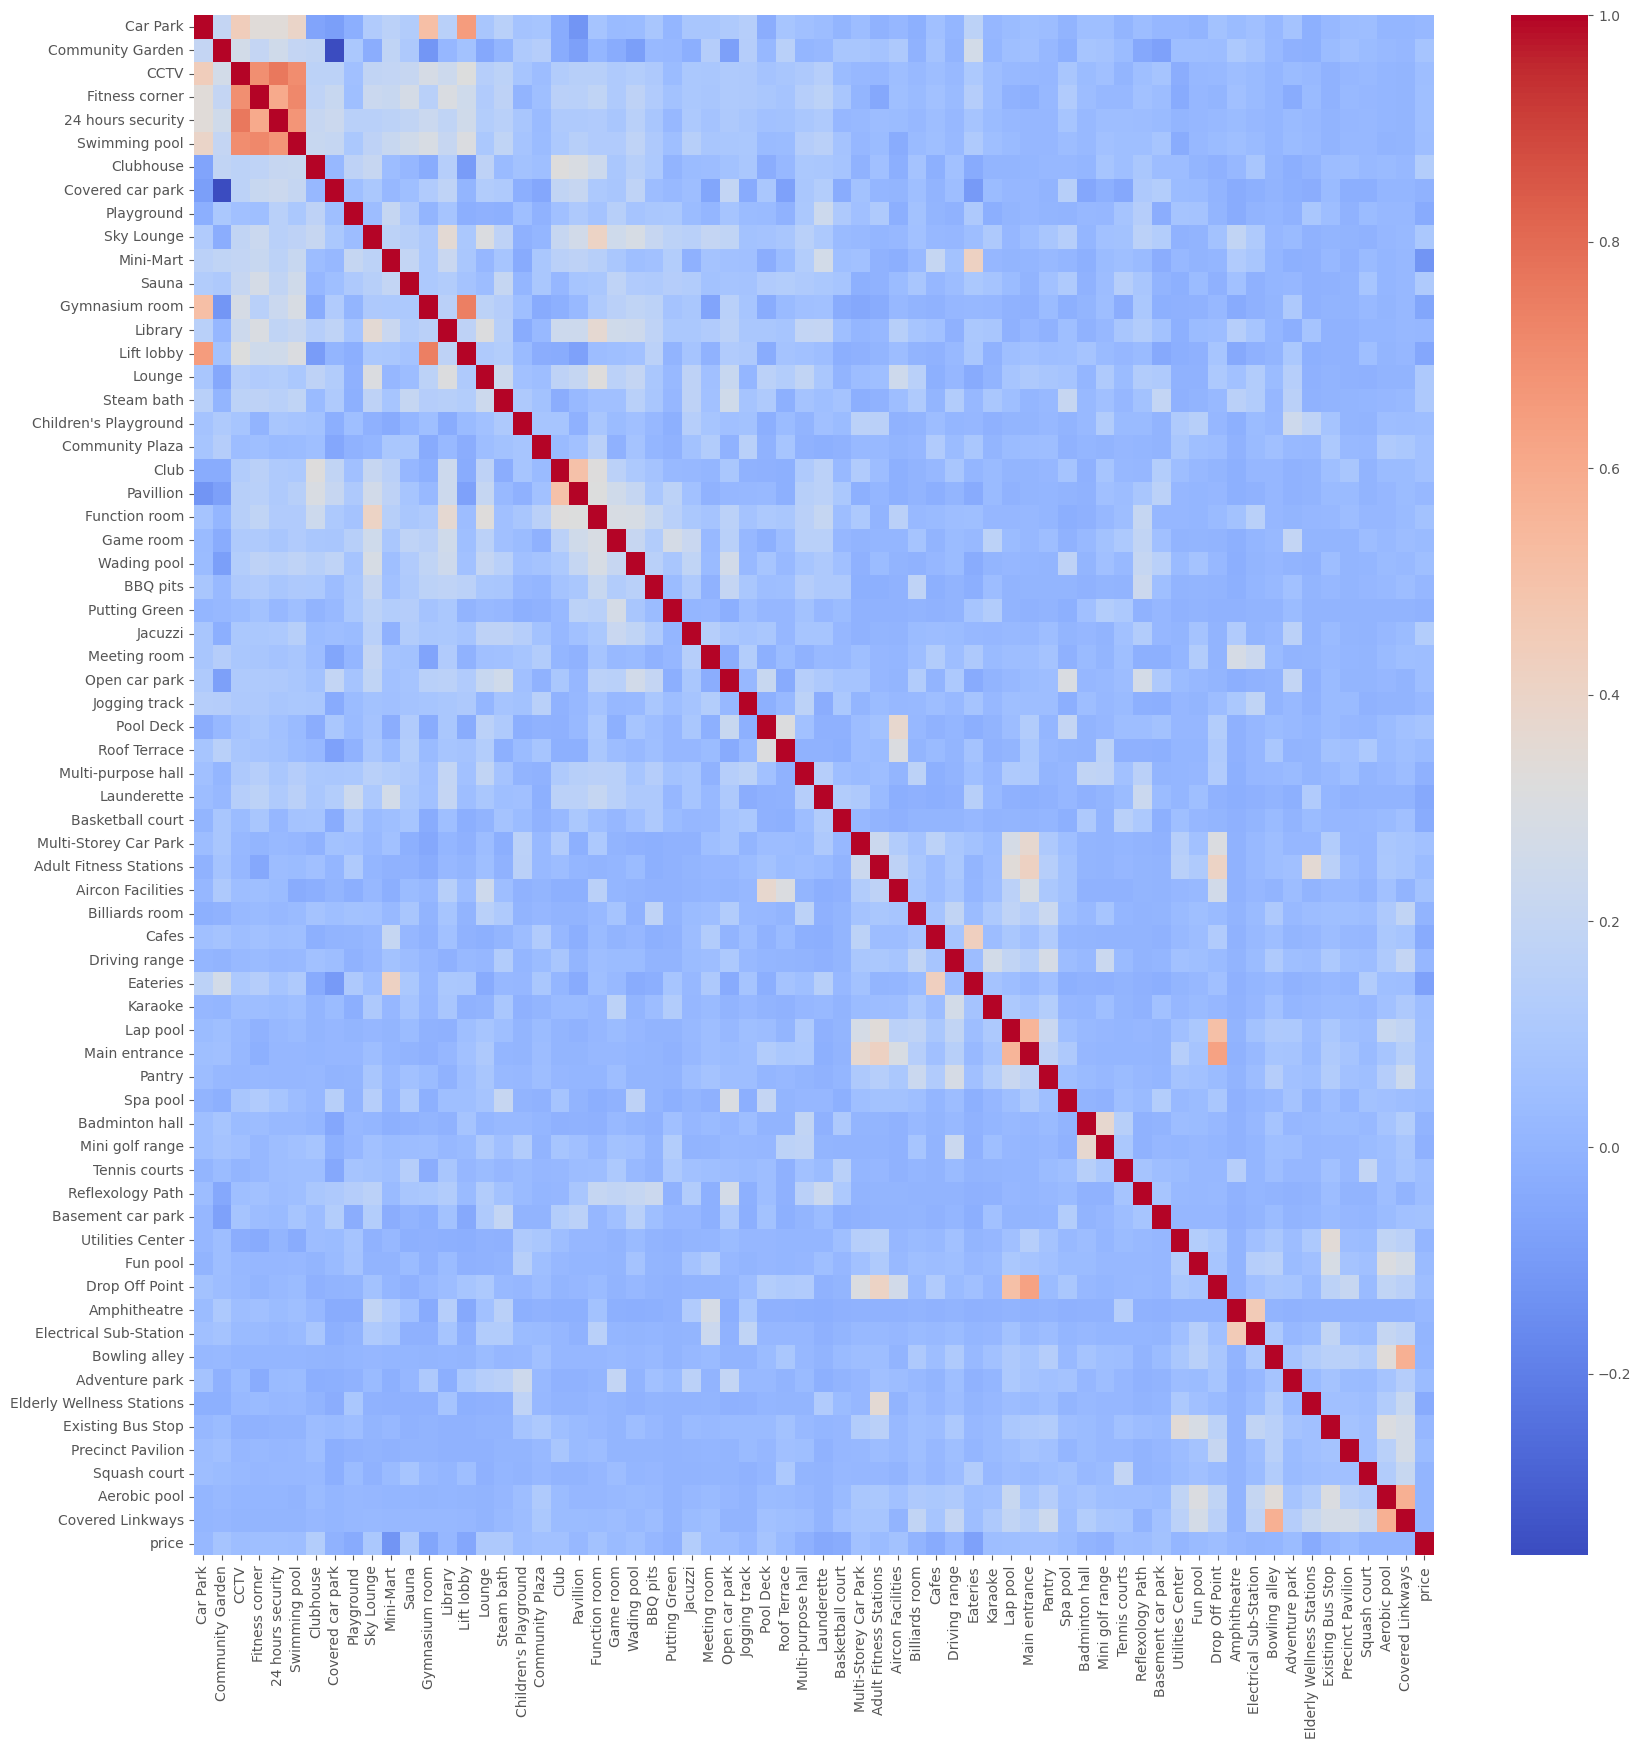

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[facility_count.keys()].corr(numeric_only=True), cmap='coolwarm')

To rough explore trends of all features that just extracted check orange and light blue color's metric

**its have significant correlation with price to include all in features**

In [26]:
# comments
# What did you understand from the abave visualization?

# To rough explore trends of all features that just extracted check orange and light blue color's metric

# **its have significant correlation with price to include all in features**

In [27]:
# district
train_df['district'].isna().sum()
test_df['district'].isna().sum()

0

In [28]:
# check floor level found Null value
train_df['floor_level'].isna().sum()

6178

<Axes: xlabel='property_type', ylabel='floor_level'>

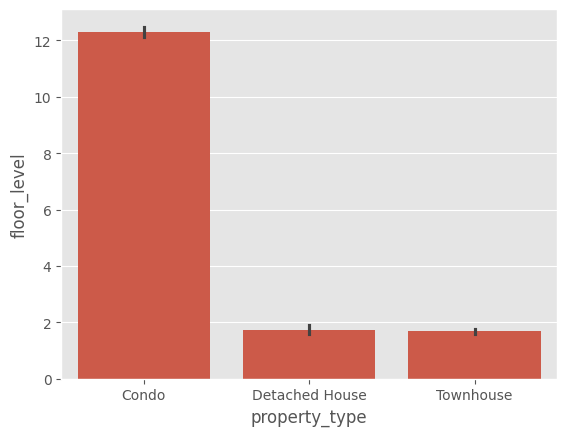

In [29]:
train_df.groupby('property_type')['floor_level'].mean()
sns.barplot(x='property_type', y='floor_level', data=train_df)

In [30]:
# Imputation for floor level by mean
for property_type, mean_value in train_df.groupby('property_type')['floor_level'].mean().items():
  train_df.loc[(train_df['property_type'] == property_type ) & (train_df['floor_level'].isna()), 'floor_level'] = mean_value

for property_type, mean_value in test_df.groupby('property_type')['floor_level'].mean().items():
  test_df.loc[(test_df['property_type'] == property_type ) & (test_df['floor_level'].isna()), 'floor_level'] = mean_value  

#### History of Fail
I dont clean it as though process history

In [31]:
# try to included land_area in model but didnt effect much
# x = 4.305785
# train_df['floor_area'] = ( train_df["land_area"].fillna(0) * x ) + train_df["floor_area"]
# test_df['floor_area'] = ( test_df["land_area"].fillna(0) * x )+ test_df["floor_area"]

In [32]:
# fillna baths to mean
train_df['baths'] = train_df['baths'].fillna(train_df['baths'].mean())
test_df['baths'] = test_df['baths'].fillna(test_df['baths'].mean())

In [33]:
# fillna bedrooms to mean
train_df['bedrooms'] = train_df['bedrooms'].fillna(train_df['bedrooms'].mean())
test_df['bedrooms'] = test_df['bedrooms'].fillna(test_df['bedrooms'].mean())

#### Switch Approach evident

In [34]:
# Comments
# How many null values are there in each of these columns?
# What is your justification for filling the null value with mean in all these cases?

print(train_df['total_units'].isna().sum())
print(test_df['total_units'].isna().sum())

3762
642


In [35]:
# First Approach total units
# with simple mind that total units is number of units in condo that will have value
# for `total_units` in another `prooperty_type` will be 1

# train_df['total_units'].fillna(1, inplace=True)
# test_df['total_units'].fillna(1, inplace=True)

In [36]:
# second approach use Mean of each property_type as statistics will do
for property_type, mean_value in train_df.groupby('property_type')['total_units'].mean().items():
  train_df.loc[(train_df['property_type'] == property_type ) & (train_df['total_units'].isna()), 'total_units'] = mean_value

for property_type, mean_value in test_df.groupby('property_type')['total_units'].mean().items():
  test_df.loc[(test_df['property_type'] == property_type ) & (test_df['total_units'].isna()), 'total_units'] = mean_value  

In [37]:
# check NAN nearby_bus_stops
print(train_df['nearby_bus_stops'].isna().sum())
print(test_df['nearby_bus_stops'].isna().sum())

8262
1474


In [38]:
# EDA nearby_bus_stops
# preferred to use mean as it will not change mean
train_df['nearby_bus_stops'].fillna(train_df['nearby_bus_stops'].mean(), inplace=True)
test_df['nearby_bus_stops'].fillna(test_df['nearby_bus_stops'].mean(), inplace=True)

In [39]:
# check NAN
print(train_df['nearby_supermarkets'].isna().sum())
print(test_df['nearby_supermarkets'].isna().sum())

386
86


In [40]:
# EDA nearby_supermarkets
# preferred to use mean as it will not change mean
train_df['nearby_supermarkets'].fillna(train_df['nearby_supermarkets'].mean(), inplace=True)
test_df['nearby_supermarkets'].fillna(test_df['nearby_supermarkets'].mean(), inplace=True)

In [41]:
# remove price from facility_count
del facility_count['price']

In [42]:
feat_num = ['distant_to_siam', 'floor_area', 'total_units', 'baths', 'bedrooms', 'floor_level', 'nearby_shops', 'nearby_stations', 'nearby_bus_stops', 'nearby_supermarkets'] + list(facility_count.keys())
feat_cat = ['property_type', 'province', 'district']

train_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distant_to_siam            14271 non-null  float64
 1   floor_area                 14271 non-null  int64  
 2   total_units                14271 non-null  float64
 3   baths                      14271 non-null  float64
 4   bedrooms                   14271 non-null  float64
 5   floor_level                14271 non-null  float64
 6   nearby_shops               14271 non-null  int64  
 7   nearby_stations            14271 non-null  int64  
 8   nearby_bus_stops           14271 non-null  float64
 9   nearby_supermarkets        14271 non-null  float64
 10  Car Park                   14271 non-null  int64  
 11  Community Garden           14271 non-null  int64  
 12  CCTV                       14271 non-null  int64  
 13  Fitness corner             14271 non-null  int

#### train - dev split

In [43]:
X = pd.get_dummies(train_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = train_df['price']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(11416, 136)
(11416,)
(2855, 136)
(2855,)


In [44]:
# Comment
# X_dev is validation dataset

In [45]:
def run_model(model, X_train, y_train, X_dev, y_dev):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_dev)
  rmse = mean_squared_error(y_dev, y_pred, squared=False)
  r2 = r2_score(y_dev, y_pred)
  print("R2 Score of train :",  r2_score(y_train, model.predict(X_train)))
  print("R2 Score of dev   :",  r2_score(y_dev, model.predict(X_dev)))
  print()
  print("RMSE of train :", mean_squared_error(y_train, model.predict(X_train), squared=False))
  print("RMSE of test  :", mean_squared_error(y_dev, model.predict(X_dev), squared=False))
  return [model, rmse, r2]

In [46]:
# create df for reports
reports = pd.DataFrame(columns=['model', 'rmse', 'r2'])

#### Dummy Regressor

In [47]:
# Excluded from current model
model_dummy = DummyRegressor(strategy='mean')
result = run_model(model_dummy, X_train, y_train, X_dev, y_dev)

reports = pd.concat([reports, pd.DataFrame([result], columns=['model', 'rmse', 'r2'])], ignore_index=True)

R2 Score of train : 0.0
R2 Score of dev   : -3.3482519945060574e-05

RMSE of train : 2174096.9819173277
RMSE of test  : 2202624.0620380994


/var/folders/mq/0c7fw2254mz82jpc3p32_7j80000gn/T/ipykernel_10807/907835642.py:5: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



#### Simple Linear Regressor

In [48]:
# LR 
lr = LinearRegression()
result = run_model(lr, X_train, y_train, X_dev, y_dev)

reports = pd.concat([reports, pd.DataFrame([result], columns=['model', 'rmse', 'r2'])], ignore_index=True)

R2 Score of train : 0.6754928470932713
R2 Score of dev   : 0.6944292487405834

RMSE of train : 1238485.8533663023
RMSE of test  : 1217556.152838309


In [49]:
# list all sklearn regression model
# from sklearn.utils import all_estimators
# print(all_estimators(type_filter='regressor'))

In [50]:
# with AdaBoostRegressor model
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
result = run_model(ada, X_train, y_train, X_dev, y_dev)
reports = pd.concat([reports, pd.DataFrame([result], columns=['model', 'rmse', 'r2'])], ignore_index=True)

# adaboost tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}
gs_ada = GridSearchCV(AdaBoostRegressor(), param_grid, verbose=1, n_jobs=-1).fit(X_train, y_train)
gs_ada.best_score_

R2 Score of train : 0.5579748636863646
R2 Score of dev   : 0.5622488661446441

RMSE of train : 1445447.7470020056
RMSE of test  : 1457292.563003351
Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.5742994746585499

In [51]:
gs_ada.best_estimator_

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)

In [52]:
result = run_model(gs_ada.best_estimator_, X_train, y_train, X_dev, y_dev)
reports = pd.concat([reports, pd.DataFrame([result], columns=['model', 'rmse', 'r2'])], ignore_index=True)

R2 Score of train : 0.5851356534089672
R2 Score of dev   : 0.5902389201114827

RMSE of train : 1400335.083956756
RMSE of test  : 1409932.954881475


In [60]:
# after tuning adaboost score better 
reports.sort_values(by='rmse')

,model,rmse,r2
1,LinearRegression(),1.217556e+06,0.694429
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",1.409933e+06,0.590239
2,"(DecisionTreeRegressor(max_depth=3, random_sta...",1.457293e+06,0.562249
0,DummyRegressor(),2.202624e+06,-0.000033


In [ ]:
# Linear Regression is the best in these model that run

# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [54]:
# test data has id and features, but does not have price
test_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,Amphitheatre,Electrical Sub-Station,Bowling alley,Adventure park,Elderly Wellness Stations,Existing Bus Stop,Precinct Pavilion,Squash court,Aerobic pool,Covered Linkways
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,0,0,0,0,0,0,0,0,0,0
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,0,0,0,0,0,0,0,0,0,0
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,0,0,0,0,0,0,0,0,0,0
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,0,0,0,0,0,0,0,0,0,0
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# preprocessing test
X_test = pd.get_dummies(test_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)

print(X_test.shape)

(2500, 136)


In [56]:
# prediction Dummy
pred_test_dummy = model_dummy.predict(X_test)
pred_test_dummy[:10]

# save as csv file
model_dummy.predict(X_test)
lr_submissions_df = test_df[['id']].copy()
lr_submissions_df['price'] = pred_test_dummy
lr_submissions_df[['id','price']].to_csv('../submissions/submission_dummy.csv', index=False)


In [57]:
# prediction LR
pred_test_lr = lr.predict(X_test)
print(pred_test_lr[:10])

# save as csv file
lr.predict(X_test)
lr_submissions_df = test_df[['id']].copy()
lr_submissions_df['price'] = pred_test_lr
lr_submissions_df[['id','price']].to_csv('../submissions/submission_lr.csv', index=False)


[5583220.02921485 6089360.70118703 4771393.9927723  5027224.05808186
 2601069.9431348  5258614.56400972 3469739.28638074 4016217.71989023
 3506011.10441925 4079236.18262837]


In [58]:
# prediction AdaBoostRegressor
pred_test_adaboost =  ada.predict(X_test)
print(pred_test_adaboost[:10])

ada.predict(X_test)
ada_submissions_df = test_df[['id']].copy()
ada_submissions_df['price'] = pred_test_adaboost
ada_submissions_df[['id','price']].to_csv('../submissions/submission_ada.csv', index=False)

[5896009.81495468 6494995.336437   4952850.06308411 5582502.23468426
 2526514.82867613 6065704.5655373  5638624.10371859 5630459.30790327
 4009281.04147465 4752100.46731826]


# Summary 



# Conclusion

after modeling we found that specific location distant have affect with pricing 
ath this case we pin point at Siam to experiment



# Recommened

if we can specific more pinpoint e.g. Silom, Sathorn that should help calculate pricing more precise

also we still can engineering features for more accuracy





In [59]:
# Final Comments 
# Organization
# - Folder organization is good. Within the file, very few organization into the various data science steps.
# No notes of comments on the code. 
# No business problem 
# No Explanation on why some features were chosen and not others etc

# Python Syntax
# Code runs without any error
# No comments -- which is not good programming practice
# Can modularize the code using functions

# Visualization
# Choose the right Visualization method
# No interpretations on the visualization.
# No major data clearning other than imputation, but no justtification

#Data Cleaning and EDA
# Visualizations are of no use without interpretation

# No External research
# Only 1 model was fit, no other model was tried out
- add ada boost

# Presentation was only the model, not the whole data science process
- fixing in P3 project 

SyntaxError: invalid syntax (279585421.py, line 23)

In [ ]:
# Resubmission Requirements
# 1. Focus on the datascience process, esp business problem and exploratory data analysis
# 2. Choice the right visualization and interpret the visualization
# 3. For imputation, justify the reason for the same
# 4. Compare the different models
# 5. Conclusion and Recommendation based on the business problem
# 6. Organize the jupyter notebook with different sections of the data science process